In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Pranav Afre/Downloads/PYTHON/ts.csv",names=["dates","Passenger"])

In [3]:
A.index=pd.to_datetime(A.dates,format="%Y-%m-%d")

In [4]:
A=A.drop(labels=["dates"],axis=1)

In [5]:
A.head()

,Passenger
dates,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


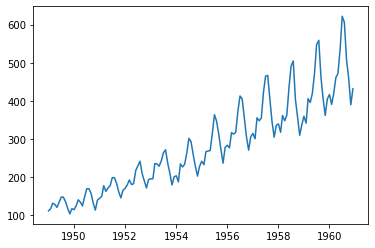

In [6]:
import matplotlib.pyplot as plt
plt.plot(A)
plt.show()

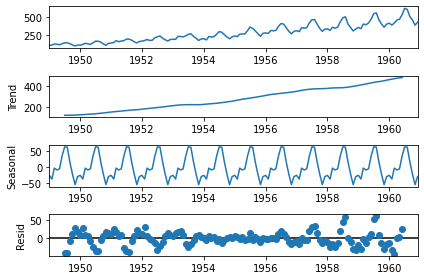

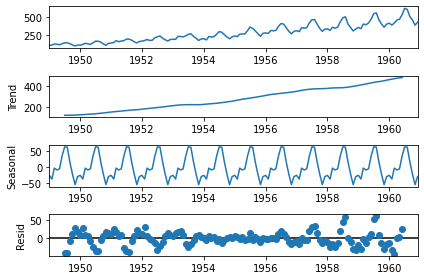

In [7]:
from statsmodels.api import tsa

tsa.seasonal_decompose(A).plot()

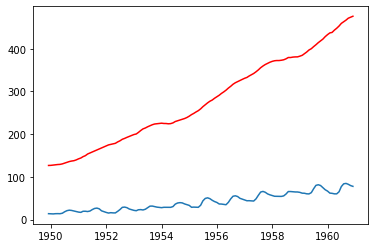

In [8]:
rm=A.rolling(window=12).mean()
rstd=A.rolling(window=12).std()

plt.plot(rm,c="red")
plt.plot(rstd)
plt.show()

In [9]:
#Dicky-Fuller Test

from statsmodels.tsa.stattools import adfuller

q=adfuller(A)
q[1]                #pValue > 0.05 -----> non-stationary

0.991880243437641

In [10]:
import numpy as np

Alog=np.log(A)

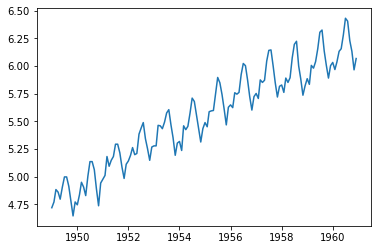

In [11]:
plt.plot(Alog)

In [12]:
z=Alog-rm

rm=z.rolling(window=12).mean()
rstd=z.rolling(window=12).std()


In [13]:
q=adfuller(z.Passenger[~z.Passenger.isna()])[1]

In [14]:
trd=A[A.index.year<=1958]
tsd=A[A.index.year>1958]

In [15]:
from statsmodels.tsa.ar_model import AR

model=AR(trd).fit()
pred=model.predict(start="1959-01-01",end="1960-12-01")


C:\Users\Pranav Afre\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarnin

In [16]:
tsd["predicted"]=pred

<ipython-input-16-297e145a5690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsd["predicted"]=pred


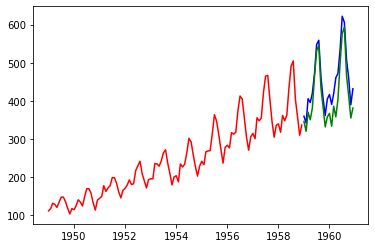

In [17]:
plt.plot(trd,c="red")
plt.plot(tsd.Passenger,c="blue")
plt.plot(tsd.predicted,c="green")